# ANZ DATA PROGRAM 


This is a “synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical
customers. It contains purchases, recurring transactions, and salary transactions. The dataset is designed
to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data.”
The data set contains 12,043 observations with 23 variables.

## Goals

* Explotary Data Analysis: Draw insights from the data about customers purchase behaviour,transactions,location and other attributes. Visualize those insights to get clear view.
* Predictive Analysis: Find out correlation on the customer's salary and other attributes, build regression model and decision tree to verify which model can accurately predict and segment the customers for future analysis.

### Preparing libraries for the analysis

In [54]:
library(dplyr)
library(stringr)
library(lubridate)
library(tidyverse)
library(rpart)
library(ggplot2)
library(ggpubr)
library(modelr)
library(boot) 
library(car)
library(QuantPsyc)
library(lmtest)
library(sandwich)
library(vars)
library(nortest)
library(MASS)
library(caTools)



Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:boot’:

    logit


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘QuantPsyc’


The following object is masked from ‘package:base’:

    norm


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: strucchange


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary


Loading required package: urca



In [2]:
anz_data<-read.csv("../input/anz-synthesised-transaction-dataset/anz.csv",na.strings=c("","NA"))

In [3]:
head(anz_data,10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,⋯,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NA,Diana,⋯,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
2,authorized,0,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NA,Diana,⋯,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
3,authorized,1,NA,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NA,Michael,⋯,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
4,authorized,1,NA,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NA,Rhonda,⋯,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
5,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NA,Diana,⋯,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
6,posted,NA,NA,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NA,NA,Robert,⋯,20,NA,NA,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NA,debit
7,authorized,1,NA,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NA,Kristin,⋯,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
8,authorized,1,NA,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NA,Kristin,⋯,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
9,authorized,1,NA,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NA,Tonya,⋯,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit


In [4]:
str(anz_data)

'data.frame':	12043 obs. of  23 variables:
 $ status           : Factor w/ 2 levels "authorized","posted": 1 1 1 1 1 2 1 1 1 2 ...
 $ card_present_flag: int  1 0 1 1 1 NA 1 1 1 NA ...
 $ bpay_biller_code : Factor w/ 3 levels " LAND WATER & PLANNING East Melbourne",..: NA NA NA NA NA NA NA NA NA NA ...
 $ account          : Factor w/ 100 levels "ACC-1037050564",..: 18 18 5 1 18 19 51 51 26 91 ...
 $ currency         : Factor w/ 1 level "AUD": 1 1 1 1 1 1 1 1 1 1 ...
 $ long_lat         : Factor w/ 100 levels "114.62 -28.80",..: 98 98 85 96 98 84 34 34 13 86 ...
 $ txn_description  : Factor w/ 6 levels "INTER BANK","PAY/SALARY",..: 5 6 5 6 6 3 6 5 5 1 ...
 $ merchant_id      : Factor w/ 5725 levels "00097987-7795-4c01-92c7-66bf486bacca",..: 2836 2858 2864 1543 4009 NA 1229 5326 4642 NA ...
 $ merchant_code    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ first_name       : Factor w/ 80 levels "Abigail","Alexander",..: 21 21 53 62 21 65 42 42 78 53 ...
 $ balance          : num  35.39 21.2 

In [5]:
#summary of dataset
summary(anz_data)

        status     card_present_flag
 authorized:7717   Min.   :0.000    
 posted    :4326   1st Qu.:1.000    
                   Median :1.000    
                   Mean   :0.803    
                   3rd Qu.:1.000    
                   Max.   :1.000    
                   NA's   :4326     
                              bpay_biller_code           account     
  LAND WATER & PLANNING East Melbourne:    1   ACC-1598451071:  578  
  THE DISCOUNT CHEMIST GROUP          :    1   ACC-1222300524:  303  
 0                                    :  883   ACC-182446574 :  292  
 NA's                                 :11158   ACC-4258502723:  260  
                                               ACC-1037050564:  259  
                                               ACC-3485804958:  245  
                                               (Other)       :10106  
 currency             long_lat       txn_description
 AUD:12043   153.41 -27.95:  578   INTER BANK: 742  
             151.23 -33.94:  303   PAY

In [6]:
sapply(anz_data,function(x)sum(is.na(x)))

status card_present_flag  bpay_biller_code           account 
                0              4326             11158                 0 
         currency          long_lat   txn_description       merchant_id 
                0                 0                 0              4326 
    merchant_code        first_name           balance              date 
            11160                 0                 0                 0 
           gender               age   merchant_suburb    merchant_state 
                0                 0              4326              4326 
       extraction            amount    transaction_id           country 
                0                 0                 0                 0 
      customer_id merchant_long_lat          movement 
                0              4326                 0

bpay_biller_code and merchant code has 90% NA values. For better analysis either dropping them or ignoring them is best to do.

## Exploitary Data Analysis

There is some data type issues can be found within the dataset:
* separate customer's longitude-lattitude in two different columns. 
* separate merchant's longitude-lattitude in two different columns.
* extract transaction time from extraction.
* change the date column to date format.

In [7]:
#changing date column's format
anz_data$date<-as.Date(anz_data$date,format = "%m/%d/%Y")

In [8]:
table(anz_data$date)


2018-08-01 2018-08-02 2018-08-03 2018-08-04 2018-08-05 2018-08-06 2018-08-07 
       137        152        157        118        100         99        114 
2018-08-08 2018-08-09 2018-08-10 2018-08-11 2018-08-12 2018-08-13 2018-08-14 
       141        149        151        131        109        104        117 
2018-08-15 2018-08-17 2018-08-18 2018-08-19 2018-08-20 2018-08-21 2018-08-22 
       144        172        136        118         97        118        150 
2018-08-23 2018-08-24 2018-08-25 2018-08-26 2018-08-27 2018-08-28 2018-08-29 
       152        156        131        116        111        128        139 
2018-08-30 2018-08-31 2018-09-01 2018-09-02 2018-09-03 2018-09-04 2018-09-05 
       143        153        137        129        109        125        149 
2018-09-06 2018-09-07 2018-09-08 2018-09-09 2018-09-10 2018-09-11 2018-09-12 
       152        152        129        120        103        118        149 
2018-09-13 2018-09-14 2018-09-15 2018-09-16 2018-09-17 2018-09-

In [9]:
#extracting time and weekday of transaction
anz_data$extraction<-as.character(anz_data$extraction)

anz_data$hour<-hour(as.POSIXct(substr(anz_data$extraction,12,19),format="%H:%M:%S"))

anz_data$weekday<-weekdays(anz_data$date)

In [10]:
head(anz_data,5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,⋯,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,hour,weekday
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,⋯,<fct>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<chr>
1,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NA,Diana,⋯,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,Wednesday
2,authorized,0,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NA,Diana,⋯,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,Wednesday
3,authorized,1,NA,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NA,Michael,⋯,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,Wednesday
4,authorized,1,NA,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NA,Rhonda,⋯,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,Wednesday
5,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NA,Diana,⋯,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,Wednesday


In [11]:
#changing longitude and latitude column
df<-anz_data[,c("long_lat","merchant_long_lat")]
df<- df %>% separate("long_lat",c("c_long","c_lat"),sep = ' ')
df<- df %>% separate("merchant_long_lat",c("m_long","m_lat"),sep = ' ')
df<-data.frame(sapply(df, as.numeric))
anz_data<-cbind(anz_data,df)
head(anz_data,5)



,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,⋯,country,customer_id,merchant_long_lat,movement,hour,weekday,c_long,c_lat,m_long,m_lat
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NA,Diana,⋯,Australia,CUS-2487424745,153.38 -27.99,debit,1,Wednesday,153.41,-27.95,153.38,-27.99
2,authorized,0,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NA,Diana,⋯,Australia,CUS-2487424745,151.21 -33.87,debit,1,Wednesday,153.41,-27.95,151.21,-33.87
3,authorized,1,NA,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NA,Michael,⋯,Australia,CUS-2142601169,151.21 -33.87,debit,1,Wednesday,151.23,-33.94,151.21,-33.87
4,authorized,1,NA,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NA,Rhonda,⋯,Australia,CUS-1614226872,153.05 -26.68,debit,1,Wednesday,153.10,-27.66,153.05,-26.68
5,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NA,Diana,⋯,Australia,CUS-2487424745,153.44 -28.06,debit,1,Wednesday,153.41,-27.95,153.44,-28.06


Now the dataset has become clear so we check if there is some anomally in details 

In [12]:
Daterange<-seq(min(anz_data$date),max(anz_data$date),by=1)
Daterange[!Daterange %in% anz_data$date]

[1] "2018-08-16"

There is no transaction history on 16th september.

In [13]:
ANZ_DATA_AUS<-anz_data%>%
  filter(!(c_long>113 & c_long<154 & c_lat>(-44) & c_lat<(-10)))
length(unique(ANZ_DATA_AUS$customer_id))

[1] 1

One customer is outside from Australia. Since the customer made all the transactions in Australia we are going to keep her/him in our analysis

### Visualizing the data insights

`summarise()` ungrouping output (override with `.groups` argument)



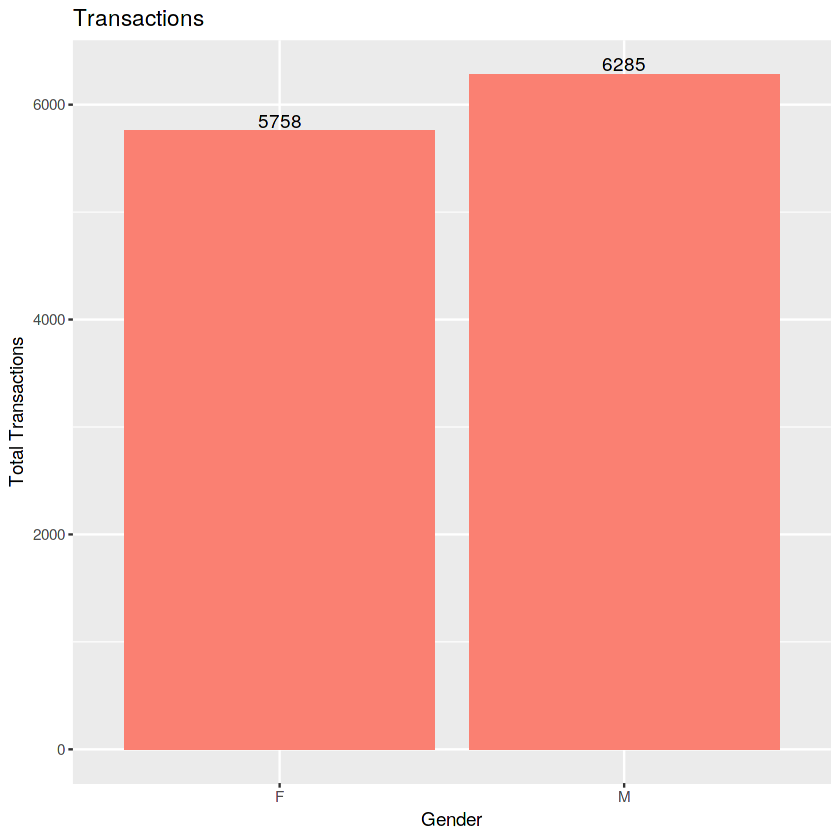

In [14]:
gender_customer_count<-anz_data %>% group_by(gender) %>% summarise(Count=n())
ggplot(gender_customer_count,aes(x=gender,y=Count))+geom_col(fill="salmon")+geom_text(aes(label=Count),vjust=-0.2)+labs(title="Transactions",x="Gender",y="Total Transactions")

Males have made 6285 transactions where females have made 5758 transactions.

`summarise()` ungrouping output (override with `.groups` argument)



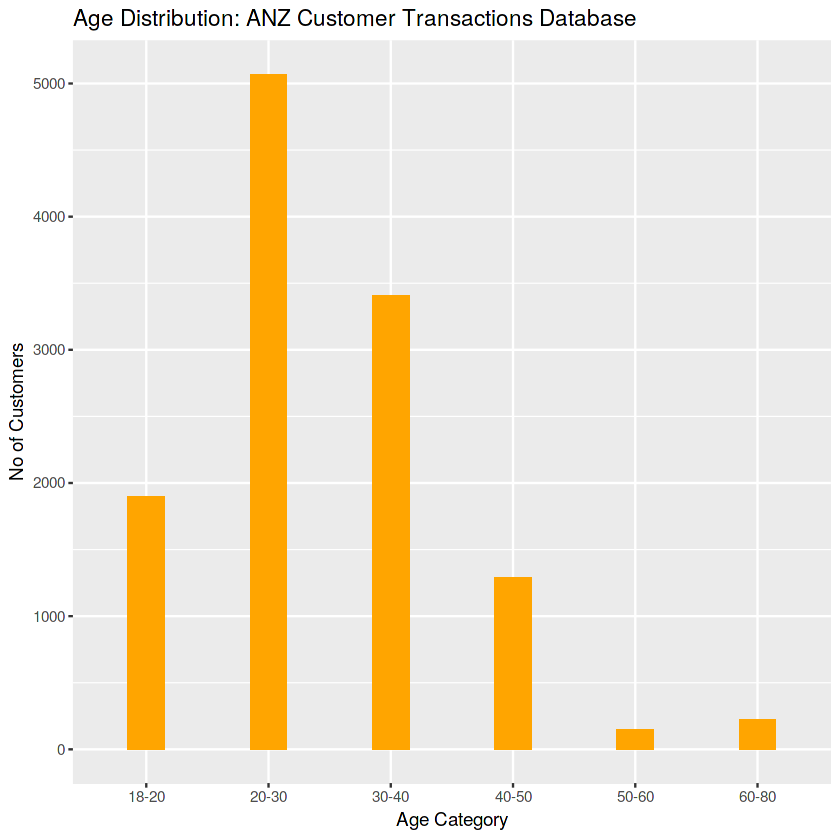

In [15]:
Age_Transactions<-anz_data %>% mutate(Age_Category=case_when(18<=age & age<=20~'18-20', 
                                                            20<age & age<=30~'20-30',
                                                            30<age & age<=40~'30-40',
                                                            40<age & age<=50~'40-50',
                                                            50<age & age<=60~'50-60',
                                                            TRUE~'60-80')) %>% group_by(Age_Category)%>% summarise(Count=n())
ggplot(Age_Transactions,aes(x=Age_Category,y=Count))+geom_bar(fill="orange",width=0.3,stat="identity")+ggtitle("Age Distribution: ANZ Customer Transactions Database") + 
  ylab("No of Customers") + xlab("Age Category")


Maximum of customers were between 20-30. Also it can be concluded that retired person have more transactions than those who are nearing the age of retirement.

`summarise()` ungrouping output (override with `.groups` argument)



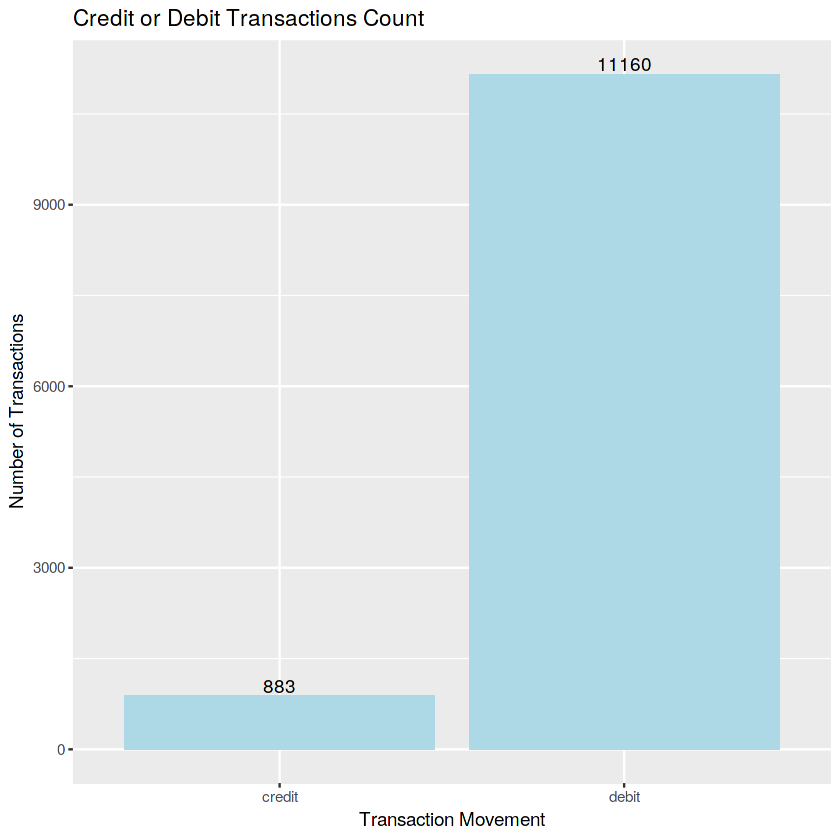

In [16]:
movement<-anz_data %>% group_by(movement)%>% summarise(count=n())
ggplot(movement,aes(x=movement,y=count))+geom_col(fill="light blue")+geom_text(aes(label=count),vjust=-0.2)+labs(title="Credit or Debit Transactions Count",
                                                                                                                x="Transaction Movement",y="Number of Transactions")

Debit transactions were 11160, and Credit transactions were 883 which can be salary credited to their account. 

`summarise()` ungrouping output (override with `.groups` argument)



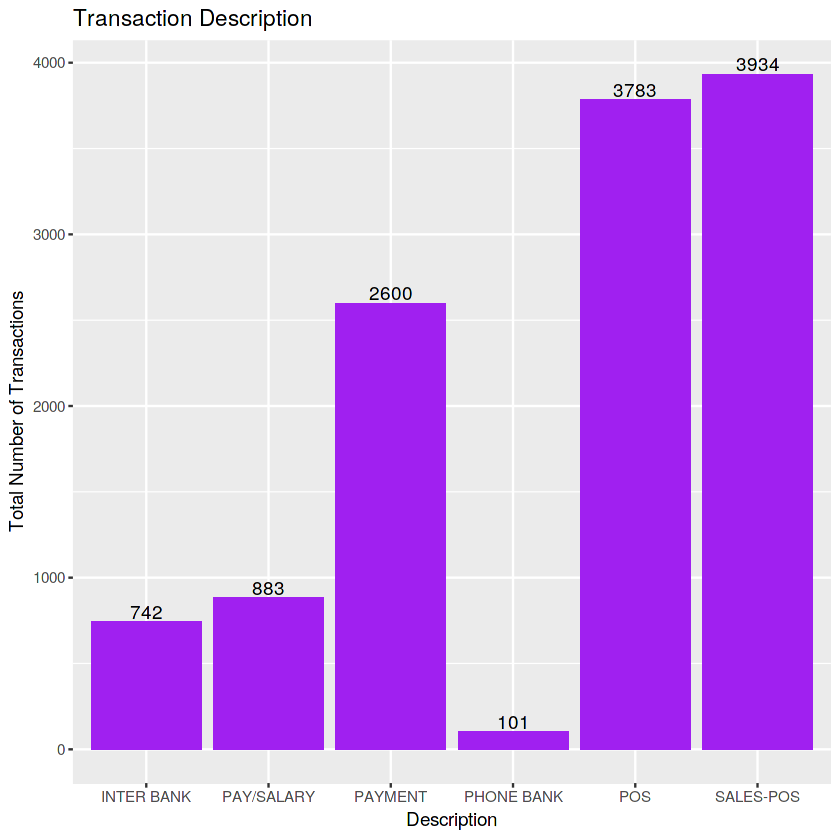

In [17]:
Transaction_type<-anz_data%>% group_by(txn_description)%>% summarise(count=n())
ggplot(Transaction_type,aes(x=txn_description,y=count))+geom_bar(stat="identity",fill="purple")+geom_text(aes(label=count),vjust=-0.2)+labs(title="Transaction Description",x="Description",y="Total Number of Transactions")

Most of the transactions were Sales and in POS category. Very small transactions were made through phone. 883 transactions were made in PAY/SALARY, we can assume these were salary credited in customers account.

`summarise()` ungrouping output (override with `.groups` argument)



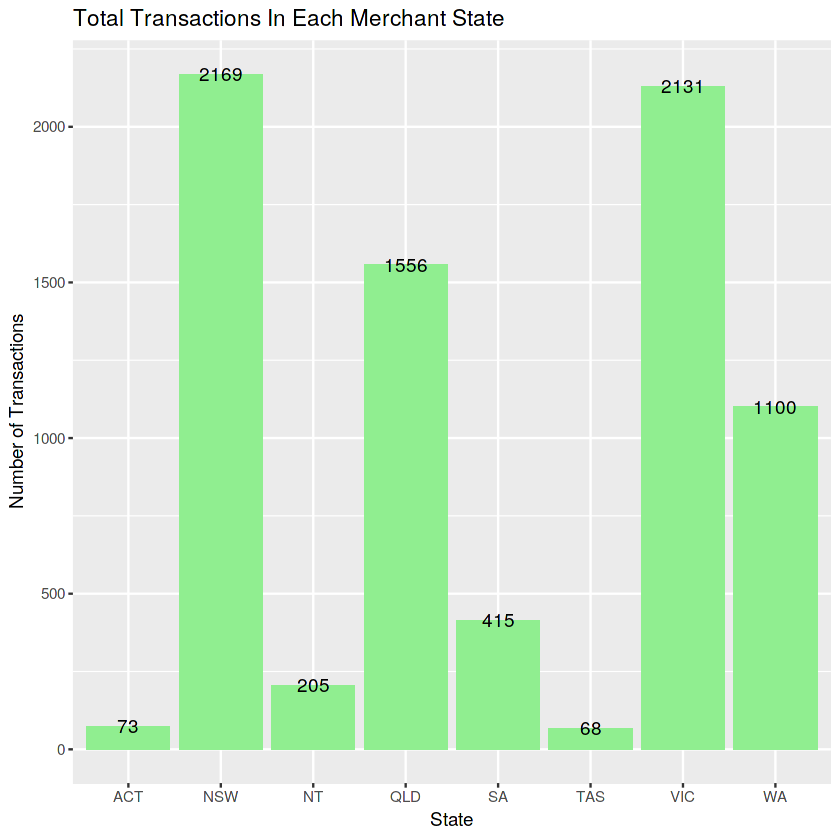

In [18]:
merchant_state_transactions<-anz_data %>% filter(merchant_id!="")%>% group_by(merchant_state) %>% summarise(count=n())
ggplot(merchant_state_transactions,aes(x=merchant_state,y=count))+geom_col(fill="light green")+geom_text(aes(merchant_state,count+0.5,label=count))+
labs(title="Total Transactions In Each Merchant State",x="State",y="Number of Transactions")

Since Sales and Point of sales such as shopping were made through merchant we filter out other transactions. It can be seen from plotted data that VICTORIA has highest number of transactions regarding sales.

We have seen how many transactions are made in each customer insights.
Now we start drawing insights regarding the amount transacted in each month, week or a day.

`summarise()` ungrouping output (override with `.groups` argument)



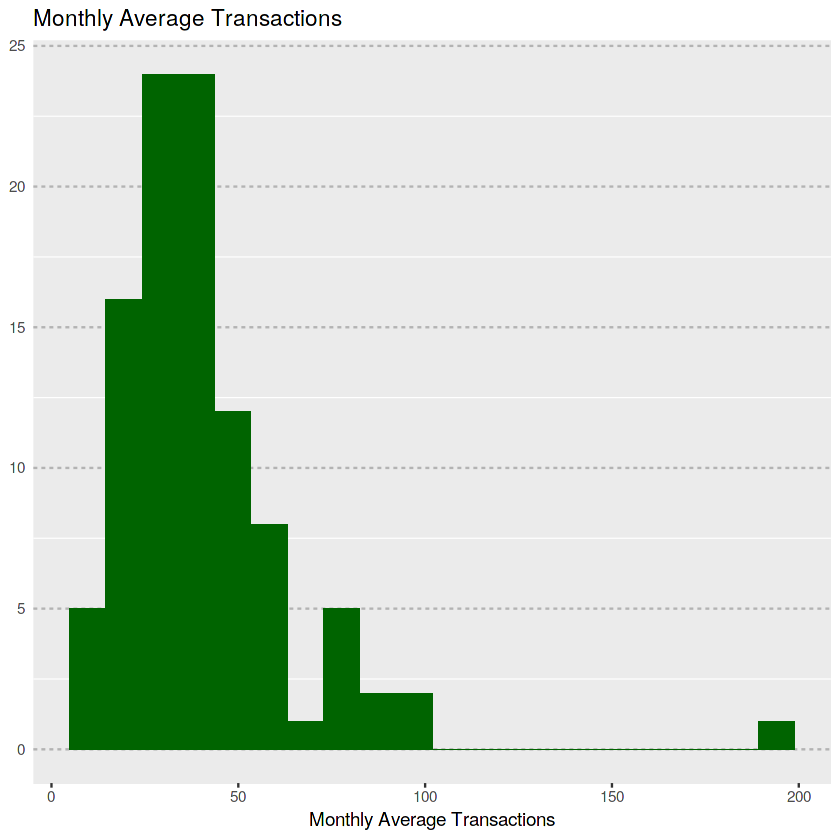

In [19]:
#historgram of total amount transacted
mean_transactions<-anz_data %>%
  group_by(customer_id) %>%
  summarise(average_trans=round(n()/3,3))

ggplot(mean_transactions,aes(average_trans))+geom_histogram(bins = 20,fill="dark green")+theme_cleveland()+
  labs(x="Monthly Average Transactions",y="Number of Customers",title="Monthly Average Transactions")


Maximum transaction were small in amount. We can see outlier around 200 AUD spent. 

`summarise()` ungrouping output (override with `.groups` argument)



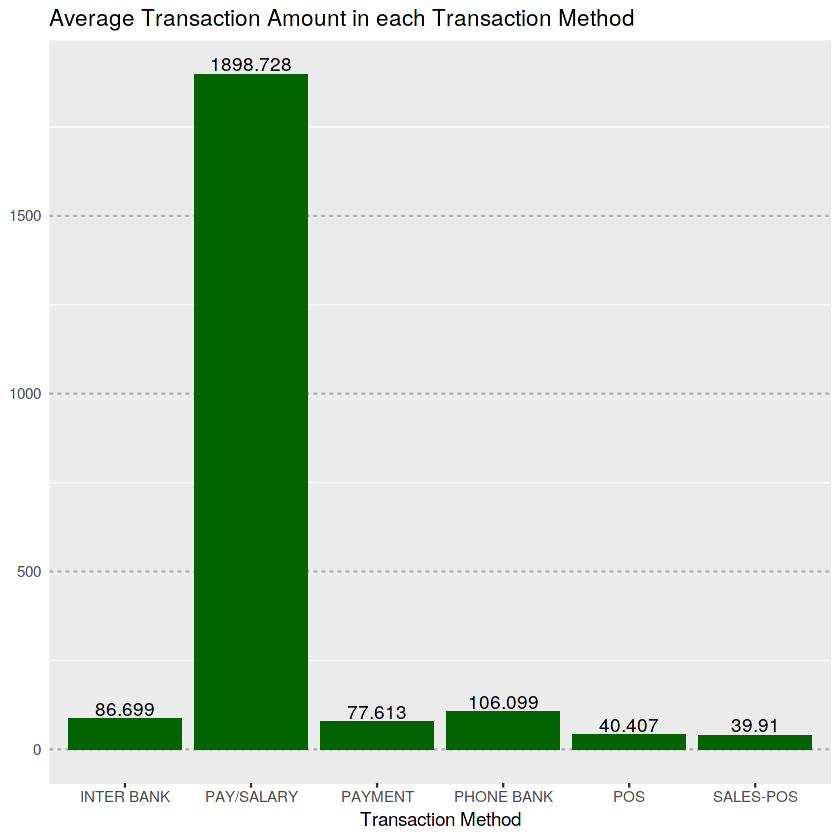

In [20]:
mean_transactions_segment<-anz_data %>%
  group_by(txn_description) %>%
  summarise(average=round(mean(amount,na.rm = TRUE),3))
ggplot(mean_transactions_segment,aes(x=txn_description,y=average))+geom_col(fill="dark green")+
  theme_cleveland()+labs(x="Transaction Method",y="Average Transaction Amount",title = "Average Transaction Amount in each Transaction Method")+
  geom_text(aes(label=average),vjust=-0.2)

Average transaction in PAY/SALARY segment is higher than any other. 

`summarise()` ungrouping output (override with `.groups` argument)



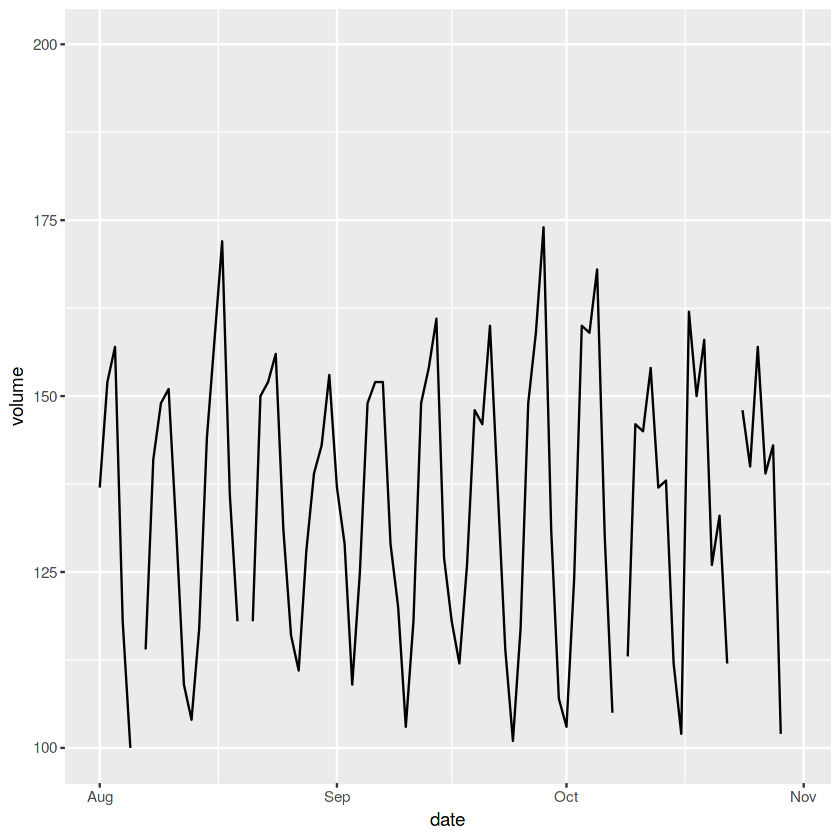

In [21]:
#Segment the transaction by date
monthly_volume<-anz_data %>% group_by(date=date) %>% summarise(volume=length(amount))
ggplot(monthly_volume,aes(x=date,y=volume))+geom_line()+ylim(100,200)

`summarise()` regrouping output by 'date' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



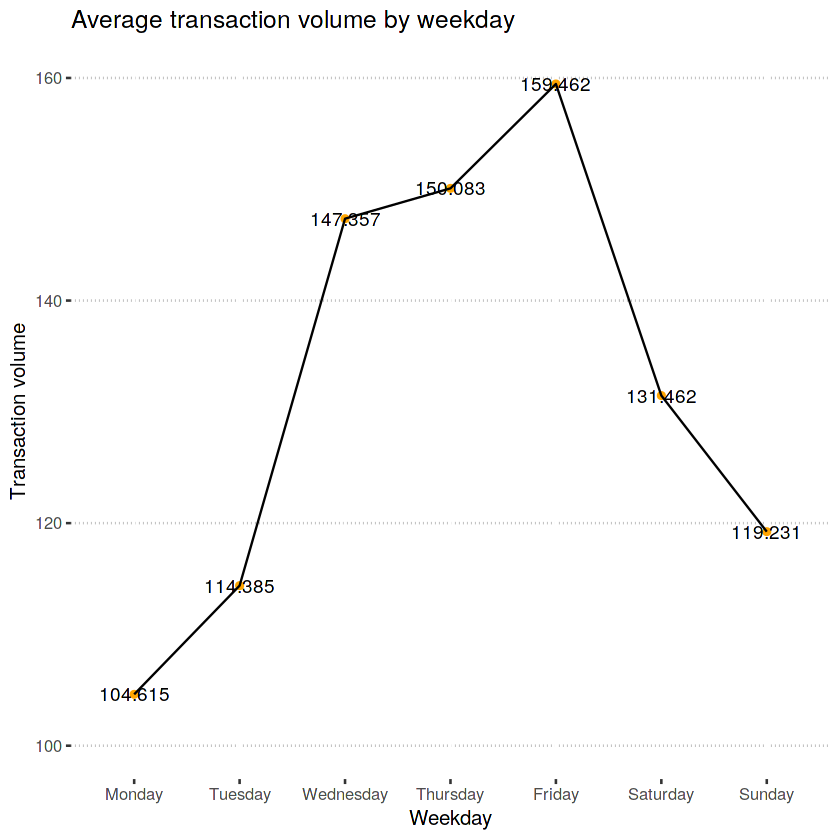

In [22]:
#segment the data by week
weekly_transaction<-anz_data %>%
  select(date,weekday) %>%
  group_by(date,weekday)%>%
  summarise(daily_avg=n())%>%
  group_by(weekday) %>%
  summarise(average_volume=round(mean(daily_avg, na.rm = TRUE),3))

weekly_transaction$weekday <- factor(weekly_transaction$weekday, levels=c( "Monday","Tuesday","Wednesday",
                                             "Thursday","Friday","Saturday","Sunday"))

ggplot(weekly_transaction,aes(x=weekday, y=average_volume)) +geom_point(color="orange")+geom_line(aes(group = 1))+
  ggtitle('Average transaction volume by weekday') +
  labs(x='Weekday',y='Transaction volume')+theme_pubclean()+ylim(100,160)+geom_text(aes(label=average_volume))                                              


Friday has maximum amount of transactions. There is steep drop in amount from weekdays to weekend likely due to bank was closed so no transactions happened at bank offices. We can also see there is increasing trend in weekdays from monday to friday. 

`summarise()` regrouping output by 'date' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



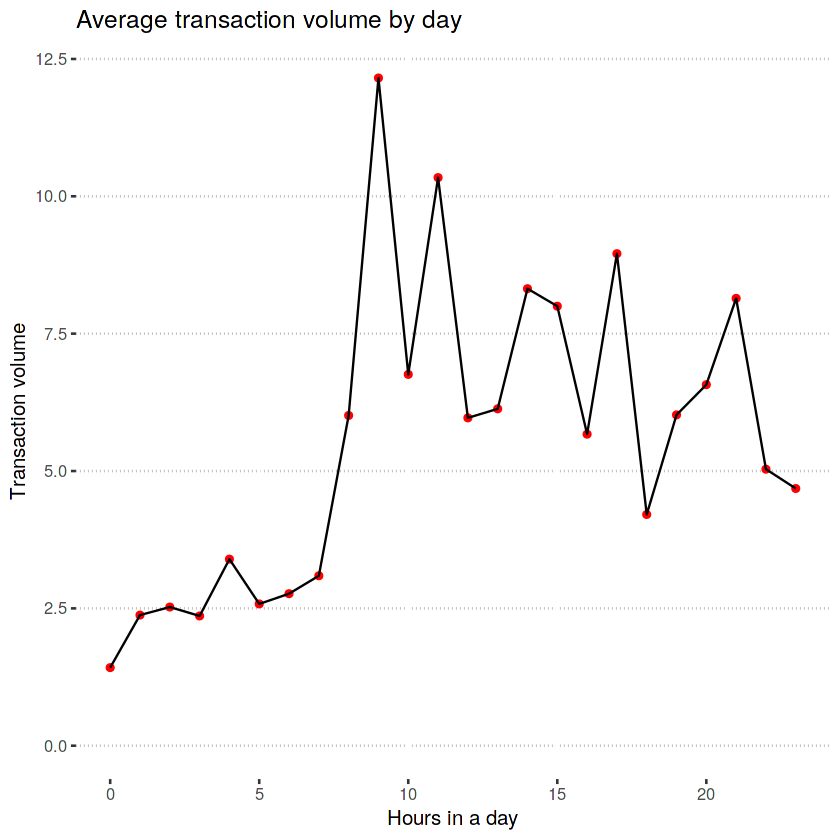

In [23]:
hourly_transactions<-anz_data %>%
  select(date,hour) %>%
  group_by(date,hour)%>%
  summarise(daily_avg=n())%>%
  group_by(hour) %>%
  summarise(average_volume=mean(daily_avg, na.rm = TRUE))

ggplot(hourly_transactions,aes(x=hour, y=average_volume)) +geom_point(colour="red")+geom_line(aes(group = 1))+
  ggtitle('Average transaction volume by day') +
  labs(x='Hours in a day',y='Transaction volume')+theme_pubclean() +expand_limits(y=0)


We can see a cyclical pattern of peaks and drops while plotting the volume of transactions segmented by month,week and day. Weekly volume starts low at around 100 transactions, rising daily until it reachs a peak around 150 by friday. From then it goes down in weekend to again repeat the cycle. Hence we see 4 peak cycles per month and 1 in each week.

Now let's look at the spending of customers over this three month. It is clear that spending has no cyclical pattern so we are going to plot the average spending in one week. 

In [24]:
mean_spending_aug<- anz_data %>% filter(date >="2018-08-01" & date<="2018-08-31") %>% group_by(date) %>% summarise(mean_spending=mean(amount))

`summarise()` ungrouping output (override with `.groups` argument)



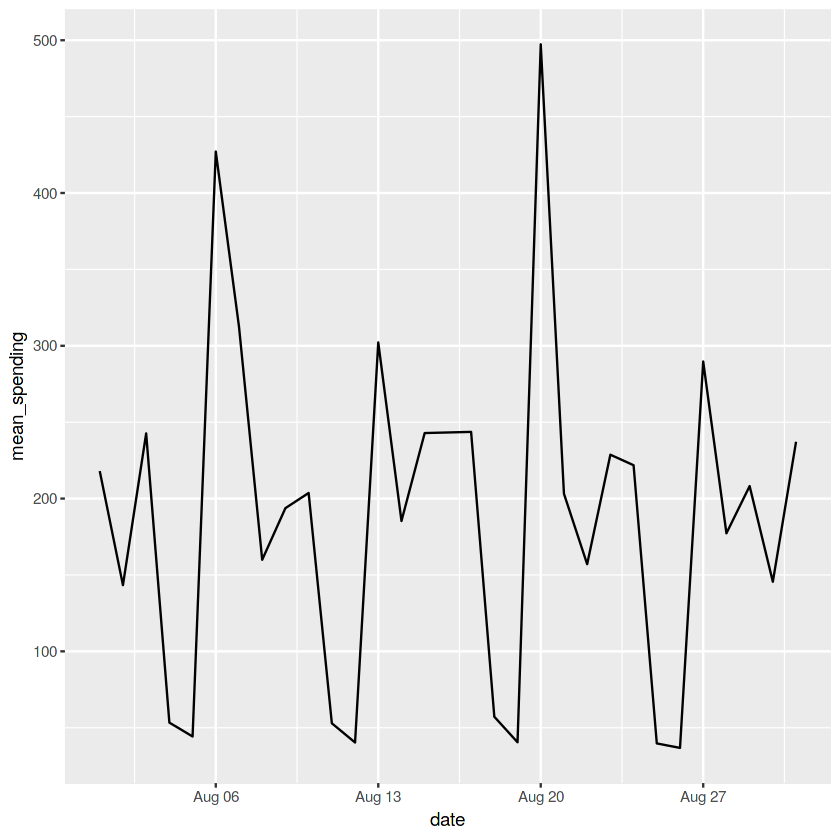

In [25]:
ggplot(mean_spending_aug,aes(x=date,y=mean_spending))+geom_line()

There is no clear pattern in one month transactions. We try to plot it for one week.

In [26]:
mean_spending_aug_week<- anz_data %>% filter(movement=="debit")%>%filter(date >="2018-08-01" & date<="2018-08-07") %>% group_by(date) %>% summarise(mean_spending=mean(amount))

`summarise()` ungrouping output (override with `.groups` argument)



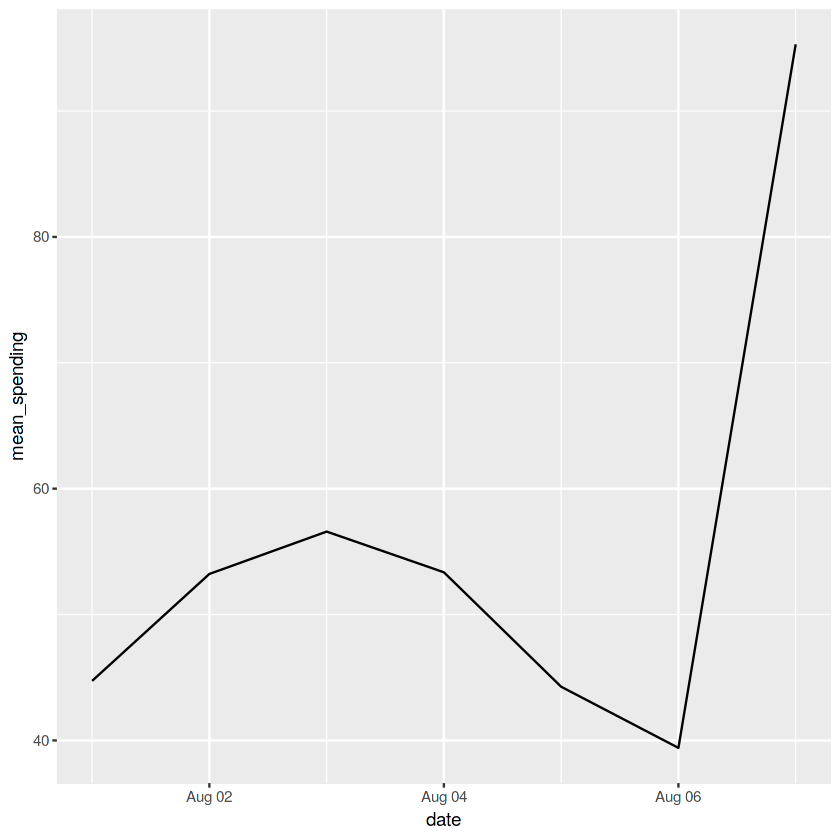

In [27]:
ggplot(mean_spending_aug_week,aes(x=date,y=mean_spending))+geom_line()

`summarise()` ungrouping output (override with `.groups` argument)



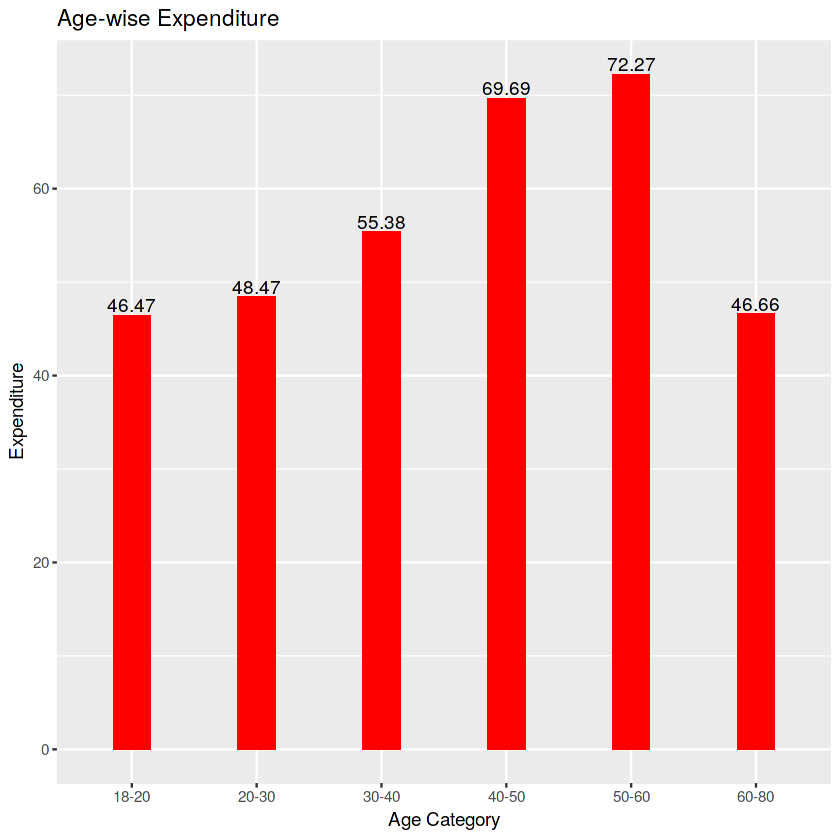

In [28]:
Age_Expenditure<-anz_data %>% filter(movement=="debit") %>%
mutate(Age_Category=case_when(18<=age & age<=20~'18-20', 
                                                            20<age & age<=30~'20-30',
                                                            30<age & age<=40~'30-40',
                                                            40<age & age<=50~'40-50',
                                                            50<age & age<=60~'50-60',
                                                            TRUE~'60-80')) %>% group_by(Age_Category)%>% summarise(Expenditure=round(mean(amount),2))
ggplot(Age_Expenditure,aes(x=Age_Category,y=Expenditure))+geom_bar(fill="red",width=0.3,stat="identity")+ggtitle("Age-wise Expenditure") + 
  ylab("Expenditure") + xlab("Age Category")+geom_text(aes(label=Expenditure),vjust=-0.2)


We have drawn some customer insights on transactions and spending. Now we find out who are the top 10 customers in these 3 month transactions based on number of transactions and amount of transactions. 

In [29]:
top_10<-anz_data %>% group_by(first_name) %>% summarise(count=n()) %>% arrange(desc(count))

`summarise()` ungrouping output (override with `.groups` argument)



In [30]:
head(top_10,10)

first_name,count
<fct>,<int>
Michael,746
Diana,578
Jessica,408
Joseph,391
Jeffrey,388
Richard,364
Kimberly,343
Tonya,292
Susan,282


In [31]:
top_10_customer<-head(top_10,10)

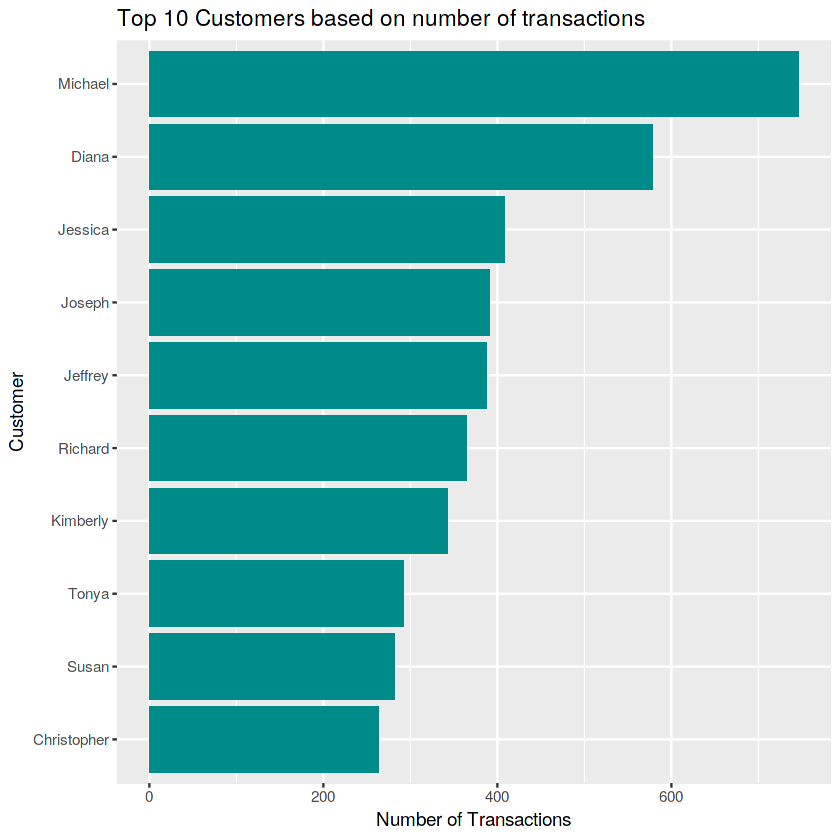

In [32]:
ggplot(top_10_customer,aes(x=reorder(first_name,count),y=count))+geom_bar(stat="identity",fill="#008B8B")+coord_flip()+labs(title="Top 10 Customers based on number of transactions",x="Customer",y="Number of Transactions")

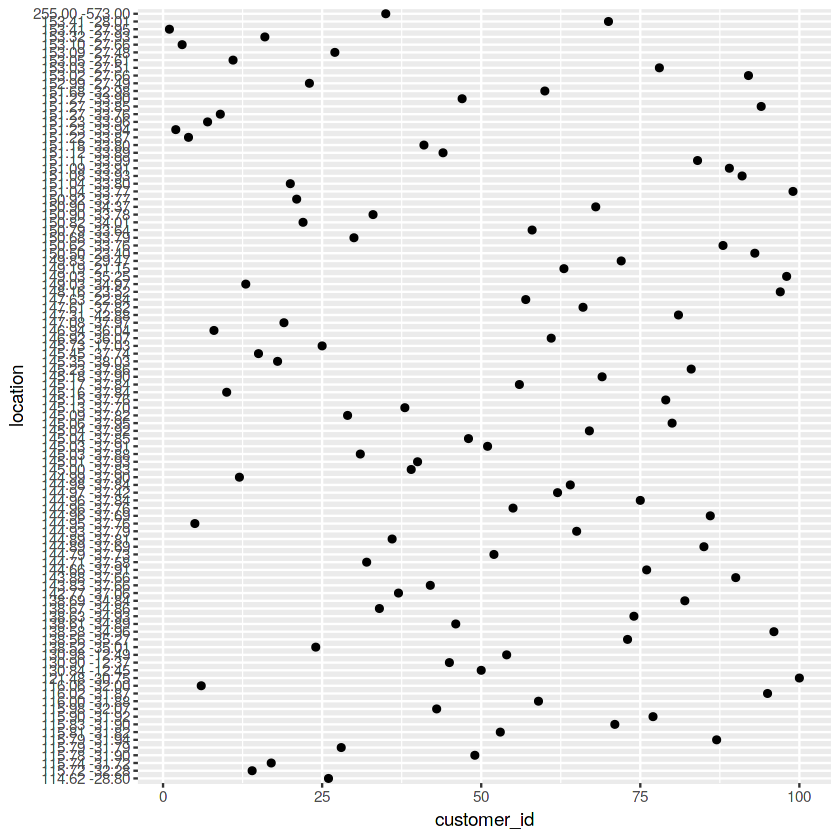

In [33]:
location_info <- data.frame(customer_id =c(1:100), location = unique(anz_data$long_lat))

ggplot(location_info, aes(x = customer_id, y = location)) +
  geom_point()

## Predictive Analysis

Our goal in this section is to build a predictive model on the dataset which can predict customer's annual salary. Also to find correlation between salary and given/derived customer attributes. Based on strong correlation first build regression model, check it's accuracy, how it can help to segment customer's in future. After that build a decision tree to evaluate it's predicting power.

Our *regression model* would consider an efficient one if the *mean squared error metrics* is **low** as possible for an *Linear Regression model*. For an *Decision Tree* build an **tree**out of the model trained. *Accuracy* should be above **85 % or more for an model to say optimal**.

In [34]:
#Calculating annual salary for 100 customers.
annual_salary<-anz_data%>% filter(txn_description=="PAY/SALARY") %>% group_by(customer_id,age,gender)%>%summarise(annual_salary=round(mean(amount)*12,2))

`summarise()` regrouping output by 'customer_id', 'age' (override with `.groups` argument)



In [35]:
dim(annual_salary)

[1] 100   4

In [36]:
head(annual_salary,10)

customer_id,age,gender,annual_salary
<fct>,<int>,<fct>,<dbl>
CUS-1005756958,53,F,11645.64
CUS-1117979751,21,M,42943.80
CUS-1140341822,28,M,22998.12
CUS-1147642491,34,F,20536.68
CUS-1196156254,34,F,46844.76
CUS-1220154422,25,F,27388.32
CUS-1233833708,44,M,7155.96
CUS-1271030853,30,F,13897.80
CUS-127297539,20,F,13665.48


### Correlation of salary with other customer attributes

### Age:
As age ranges from 18 to 78 in this dataset - that is, from people just starting their careers to retirees there
is a somewhat non-linear relationship between age and annual salary when considering the entire age range.
One reason is that those customers beyond the age of 60 all have incomes on the lower end of the spectrum.
Annual salaries range between 28,623.84 and 141,375.68, but there appears to be quite a lot of variance
in salary across the 18 to 60 age range with some 18 year olds making over 100,000 and some 50 year olds
making around 50,000.

`geom_smooth()` using formula 'y ~ x'



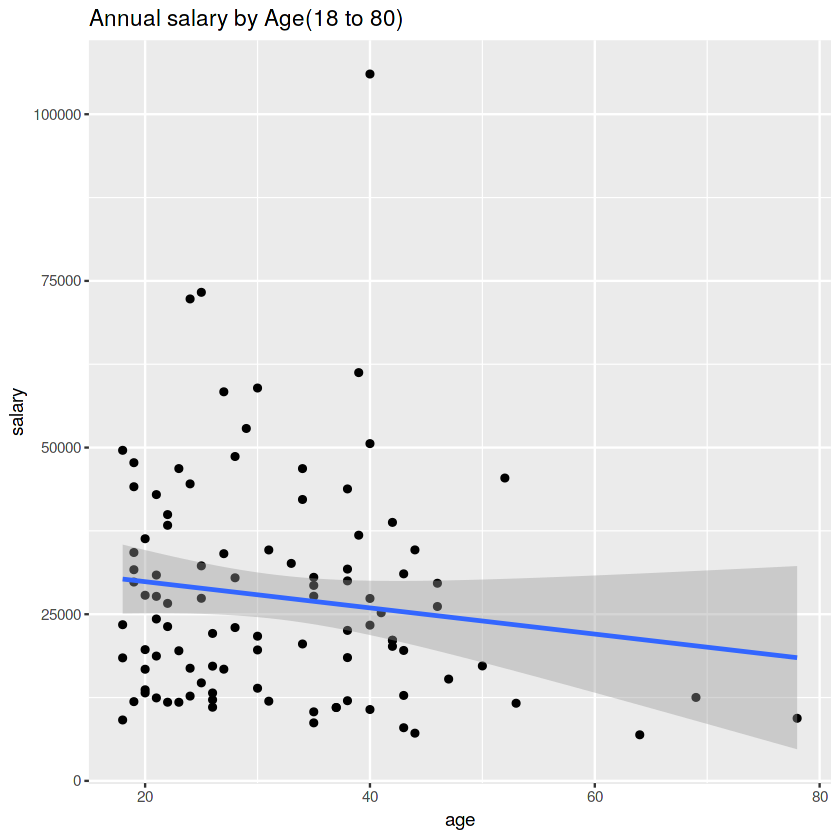

In [37]:
ggplot(annual_salary,aes(y=annual_salary,x=age))+geom_point()+geom_smooth(method="lm")+labs(title="Annual salary by Age(18 to 80)",y="salary",x="age")

In [38]:
cor(annual_salary$annual_salary,annual_salary$age)

[1] -0.1352639

There is an negative correlation with age and salary. Which is fairly due to after 60 customers are retired and there is steep decrease in salary. From the scatter plot it can be concluded there is non linear relationship between age and salary.

### Gender: 
At one glance and barplot it is clear that men's salary is higher than women but we can formalised this based on t-test. Before performing t-test we chechk normality of the data. 

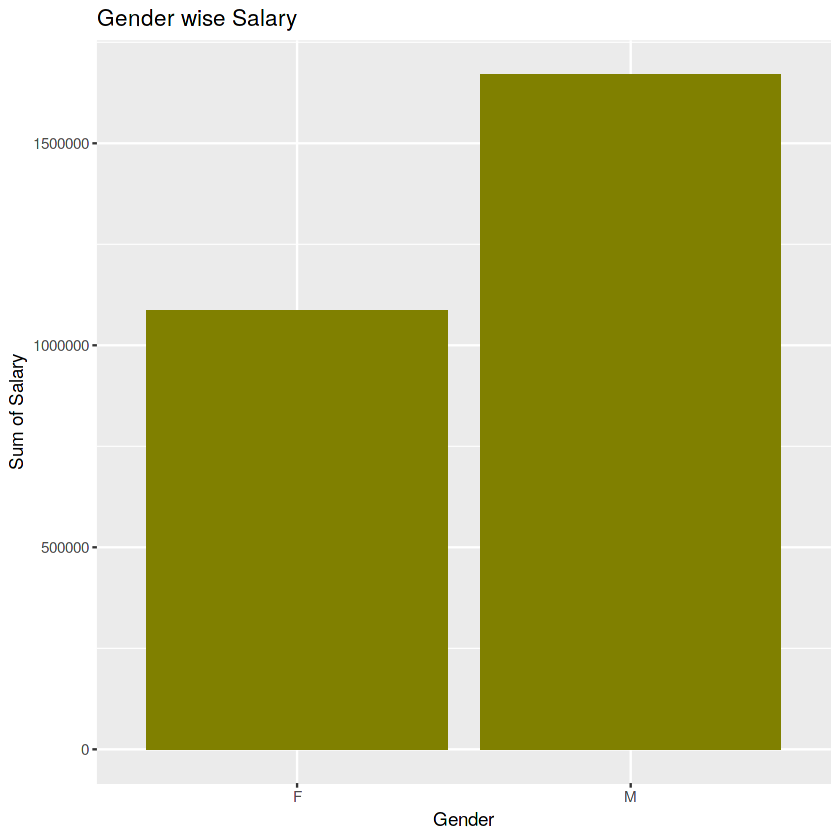

In [39]:
ggplot(annual_salary,aes(x=gender,y=annual_salary))+geom_col(fill="#808000")+labs(title="Gender wise Salary",x="Gender",y="Sum of Salary")

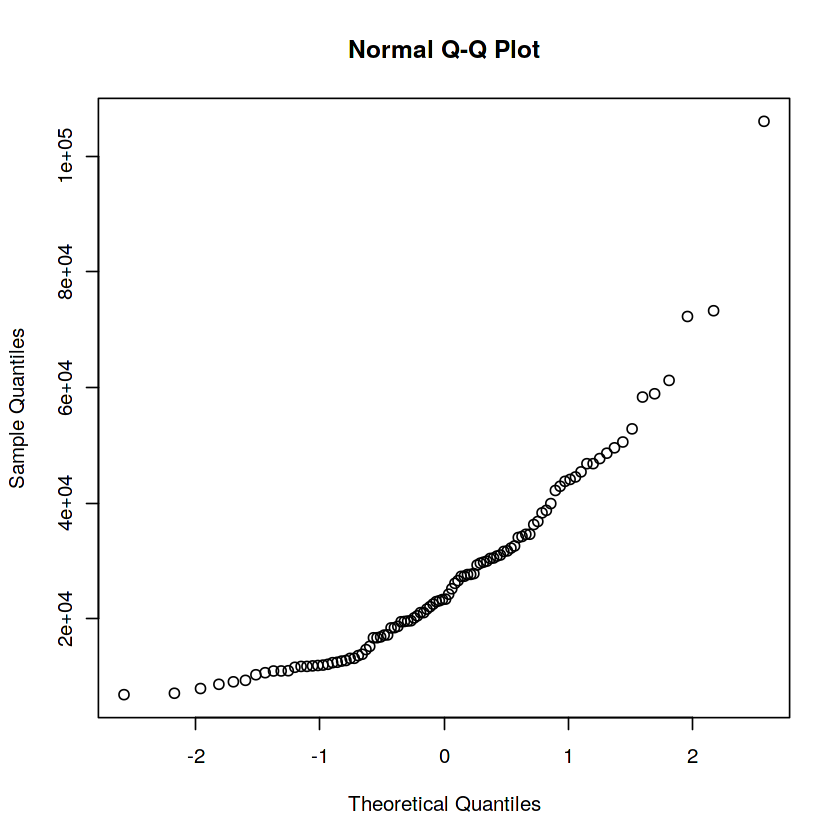

In [40]:
qqnorm(annual_salary$annual_salary)

Two Sample t-test:
We will test the following hypotheses at the 5% significance level:
* Null Hypothesis: The mean annual salary of men is no different from the mean annual salary of women.
* Alternate Hypothesis: The mean annual salary of men is greater than the mean annual salary of women.

In [41]:
salary_men = as_vector(annual_salary %>% filter(gender == 'M') %>% select(annual_salary))
salary_women = as_vector(annual_salary %>% filter(gender == 'F') %>% select(annual_salary))
t.test(salary_men, salary_women, alternative = 'greater')

Adding missing grouping variables: `customer_id`, `age`

Adding missing grouping variables: `customer_id`, `age`




	Welch Two Sample t-test

data:  salary_men and salary_women
t = 0.93704, df = 296.96, p-value = 0.1748
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1313.972       Inf
sample estimates:
mean of x mean of y 
 9976.369  8249.437 


With a test statistic of 0.90327 giving a p-value of 0.1835, at the 5% significance level, there is evidence to
suggest that we should not reject the null hypothesis that the mean annual salary of men is no different from
the mean annual salary of women.

In [42]:
#Calculating Spending of customers 
annual_spending<-anz_data %>%filter(!(txn_description %in% c('PAY/SALARY',"INTER BANK", "PHONE BANK","PAYMEN
T"))) %>% group_by(customer_id) %>% summarise(purchase_spending=round(mean(amount)*12,2))

`summarise()` ungrouping output (override with `.groups` argument)



In [43]:
dim(annual_spending)

[1] 100   2

We are going to consider yearly spending to summarise their spending habits.

In [44]:
salary_data<-merge(annual_salary,annual_spending)
head(salary_data)

,customer_id,age,gender,annual_salary,purchase_spending
,<fct>,<int>,<fct>,<dbl>,<dbl>
1,CUS-1005756958,53,F,11645.64,654.08
2,CUS-1117979751,21,M,42943.80,1034.72
3,CUS-1140341822,28,M,22998.12,885.89
4,CUS-1147642491,34,F,20536.68,755.27
5,CUS-1196156254,34,F,46844.76,409.83
6,CUS-1220154422,25,F,27388.32,815.22


`geom_smooth()` using formula 'y ~ x'



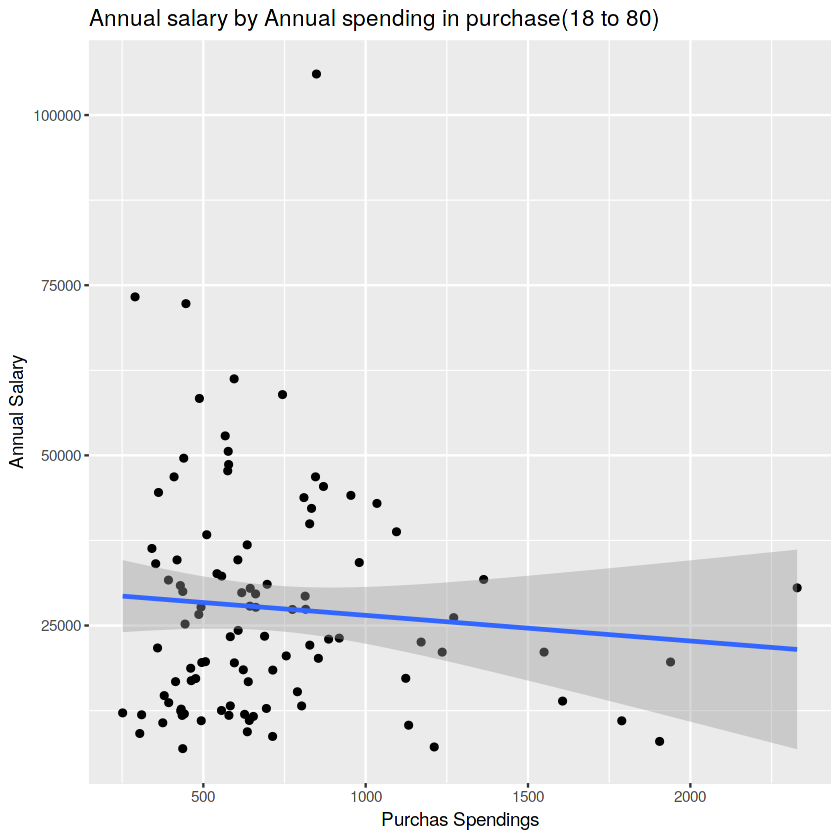

In [45]:
ggplot(salary_data,aes(y=annual_salary,x=purchase_spending))+geom_point()+geom_smooth(method="lm")+labs(title="Annual salary by Annual spending in purchase(18 to 80)",x="Purchas Spendings",y="Annual Salary")

In [46]:
cor(salary_data$annual_salary,salary_data$purchase_spending)

[1] -0.08499756

Mutiple Regression Model:
We will fit a multiple regression model using the three metrics discussed - age, gender and spending - and
then assess its accuracy.
First, gender must be recoded as a binary numeric variable. We will use ‘1’ for male and ‘0’ for female

In [47]:
salary_data$gender<-ifelse(salary_data$gender=="M",1,0)

## Model Building

### Regression Model 

Now, we fit the model using 60% of the dataset as training data. This will allow us to test the predictive
accuracy of the model using the remaining 40%.

In [49]:
set.seed(101)
sample = sample.split(names(salary_data), SplitRatio = 0.6)
train = subset(salary_data, sample == TRUE)
test = subset(salary_data, sample == FALSE)

In [74]:
glimpse(test)

Rows: 40
Columns: 6
$ customer_id       <fct> CUS-1140341822, CUS-1147642491, CUS-1271030853, CUS…
$ age               <int> 28, 34, 30, 20, 24, 23, 19, 40, 26, 64, 40, 18, 40,…
$ gender            <dbl> 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, …
$ annual_salary     <dbl> 22998.12, 20536.68, 13897.80, 13665.48, 16896.96, 4…
$ purchase_spending <dbl> 885.89, 755.27, 1606.44, 393.31, 462.71, 845.55, 98…
$ pred              <dbl> 33616.08, 19921.98, 17730.10, 20588.88, 34604.68, 3…


In [50]:
model<-lm(annual_salary~age+gender+purchase_spending,data=train)
summary(model)


Call:
lm(formula = annual_salary ~ age + gender + purchase_spending, 
    data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-19372 -12620  -2902   9886  42521 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       36113.201   6324.263   5.710 4.48e-07 ***
age                -209.046    168.100  -1.244    0.219    
gender              118.743   4032.175   0.029    0.977    
purchase_spending    -3.230      5.509  -0.586    0.560    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15390 on 56 degrees of freedom
Multiple R-squared:  0.0396,	Adjusted R-squared:  -0.01185 
F-statistic: 0.7697 on 3 and 56 DF,  p-value: 0.5159


In [52]:
final_model<-lm(annual_salary~age+gender+purchase_spending,data=test)
summary(final_model)


Call:
lm(formula = annual_salary ~ age + gender + purchase_spending, 
    data = test)

Residuals:
   Min     1Q Median     3Q    Max 
-21040 -10531  -3520   4016  72119 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)       21232.687  11033.716   1.924   0.0622 .
age                  16.890    295.055   0.057   0.9547  
gender            14121.438   5949.307   2.374   0.0231 *
purchase_spending    -2.496      7.966  -0.313   0.7559  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18300 on 36 degrees of freedom
Multiple R-squared:  0.1411,	Adjusted R-squared:  0.06949 
F-statistic: 1.971 on 3 and 36 DF,  p-value: 0.1358


From previous tests we have already seen that age and gender are not significant variable in predicting annual salary. However in test data this model has significant variable gender. Now we check how accurate is the model? Should ANZ use this model to segment the customers?

In [55]:
#check for multicollinearity
vif(final_model)

age            gender purchase_spending 
         1.124597          1.033126          1.090033

In [56]:
#fittting the model wrt original data
fitted(final_model)


3        4        8        9       13       14       18       19 
33616.08 19921.98 17730.10 20588.88 34604.68 33632.31 33228.57 20972.16 
      23       24       28       29       33       34       38       39 
33789.72 21224.09 33912.33 20777.48 34097.14 34558.12 19793.34 35053.31 
      43       44       48       49       53       54       58       59 
20817.69 32958.66 20134.76 20453.14 18997.77 34384.75 33330.88 19273.43 
      63       64       68       69       73       74       78       79 
34341.91 32196.58 33074.01 19936.16 34236.72 34560.86 34451.70 19754.91 
      83       84       88       89       93       94       98       99 
34218.83 20226.38 32593.20 19882.95 34637.54 16900.18 34964.78 34604.21

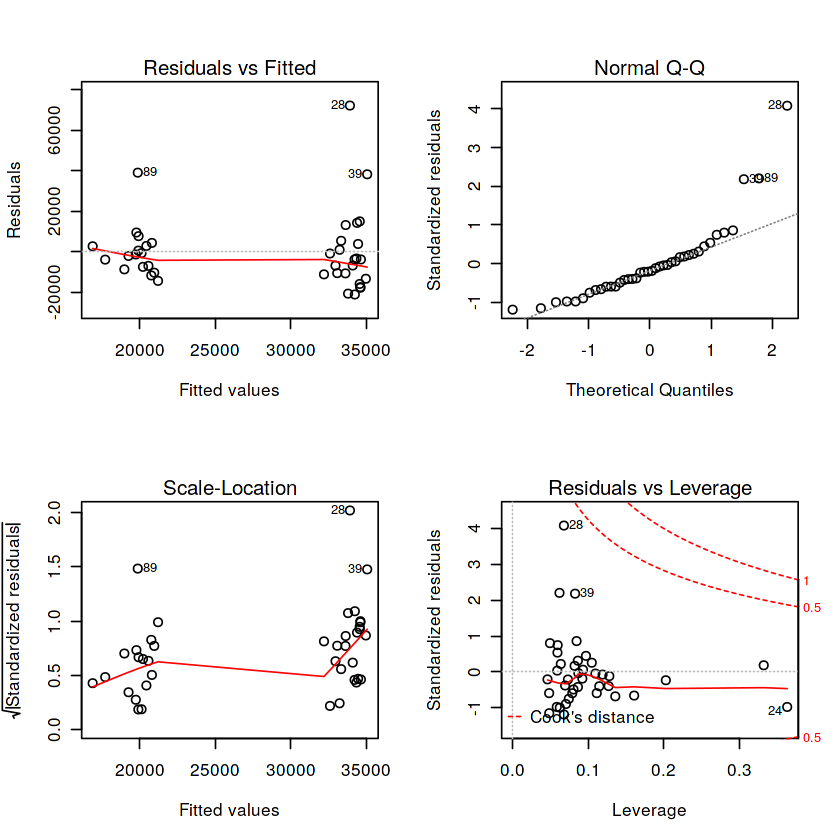

In [57]:
#ploting to see residuals
par(mfrow=c(2,2))
plot(final_model)

In [58]:
options(scipen = 999)
test$pred <-fitted(final_model)
attach(test)
mape <-print(((sum((abs(test$annual_salary-test$pred))/test$annual_salary))/nrow(test)))
rmse <-print(sqrt(mean(test$pred-test$annual_salary)^2))

The following object is masked _by_ .GlobalEnv:

    annual_salary




[1] 0.4953864
[1] 0.0000000000006367351


MAPE and RMSE metrics are evaluated to see what are the prediction error in the model. From the evaluation it can be seen there is large prediction error. Therefore ANZ should not use this model to segment the customers. There is room for improvement though. Finding better predictors and highly correlated variables will reduce the error and increase the model predicting power. 

### Decision Tree Model

For challenge we will be building decision tree model on the same train set and predict it on test to check it's accuracy. 

In [75]:
salary_tree<-rpart(annual_salary~age+gender+purchase_spending,data=train,method="anova",control=rpart.control(minsplit=14))


In [64]:
library(rpart)
library(tree)
library(ISLR)
library(rpart.plot)
library(caret)
library(party)
library(RColorBrewer)
library(rattle)

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:boot’:

    melanoma



Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4


Attaching package: ‘modeltools’


The following object is masked from ‘package:car’:

    Predict


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



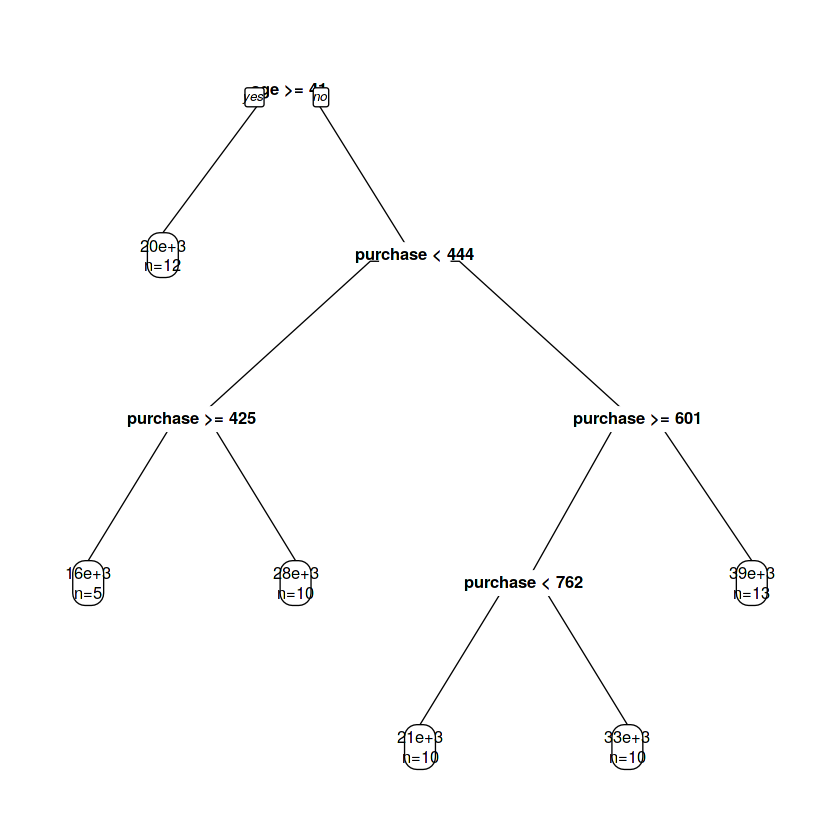

In [76]:
prp(salary_tree,faclen=0,cex = 0.8,extra = 1)

In [80]:
predict_salary<-predict(salary_tree,test,interval="prediction",level=0.90)

In [85]:
rmse_tree<-sqrt(mean((test$annual_salary-predict_salary)^2))
rmse_tree

[1] 20401.92

RMSE is significantly lower than linear regression model.This suggests that as
suspected, the relationships of annual salary with some of the predictors being used (such as age) were not
actually linear. So using a non-linear tree-based method has yielded a more accurate predictive model.

### Conclusion
The tree based model has greater predictive accuracy than the linear model, so it is the recommended model for ANZ to segment
customers into income brackets for reporting purposes. Further gains in accuracy may be possible through
techniques like pruning, cross validation, experimenting with parameters and consensus tree-based models like random
forest.